# Summary analysis of evaluation output.

The purpose of this notebook is to describe the results; specifically, the evaluation statistics.

## Executive summary.
I make the following three conclusions from this work package of the UnSeen project:

1. Very few patient records met our definition of complex mental health difficulties.
2. We tested over half a million features and very few scored highly.
3. Patient records were more likely to meet our definition if:
    - they contained more mental-health diagnoses (25% improvement in certainty).
    - they contained a combination of “Concurrent” AND “Treatment” AND “Consistency” features (7.6% improvement in certainty).
    - there was a regular pattern of attendance / non-attendance (7.4% improvement in certainty).
4. Patient records were less likely to meet our definition if:
    - they contained no prescriptions for antipsychotics AND 1-3 “Concurrent” features (10-11% improvement in certainty).
    - they contained no prescriptions for antipsychotics AND 1-2 “Antecedent” AND 1-3 “Concurrent” AND additional features (8-9% improvement in certainty).


### Load requirements.

In [1]:
%run 'UNSEEN_helper_functions.ipynb'
%store -r

# Set save location.
plot_dir = pathlib.Path(os.getcwd() + '/Plots/Publication/')
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

 
Before describing the evaluation output, let me remind the reader of our aim and the constraints of our context.


## The story so far
The aim of this investigation has been to identify features within patients’ primary-care electronic healthcare records
that are associated with our provisional definition of complex mental health difficulties. In `UNSEEN_create_caseness_variales.ipynb`,
I show that the caseness of complex mental health difficulties can be known with considerable certainty, in this dataset. We know this
because the entropy of our caseness variable is $14.3\%$ of its theoretical maximum, i.e. it is only
$14.3\%$ as uncertain / surprising / unforeseeable as it could possibly be. Conversely, this means
the caseness of a given patient record is $85.7\%$ as certain / unsurprising / foreseeable as it could possibly be.
In fact, we could correctly classify $98.0\%$ of patient records in this our dataset if we simply assumed that no record met
our definition fpr complex mental health difficulties. Thus, I knew from an early stage that it would be difficult for any feature set to improve the indicative
performance of simply assuming that the patient record did not meet out definition.

<br/>
<br/>

## The findings
### _The distribution of feature sets across the range of scaled mutual information observed._

The vast majority of feature sets score very low for scaled mutual information, which means they do little to improve our certainty about
whether a patient record met our definition for the caseness of complex mental health difficulties. To illustrate this point, below I show the scaled
mutual information for each feature in ranked order.

The rank on the horizontal axis is presented in $log_{10}$ to illustrate how slowly the scaled mutual information declines with orders of magnitude
of rank. This is visualised by a straight line fit through the log rank. For example, the data points in the bottom right tell us that approximately
$10^{5.5} = 350,000$ feature sets show a scaled mutual information <1%; this is $86$% of all feature sets. On the other hand, the outlier in the top
left represents the single feature set that showed a >8.2% scaled mutual information: the count of psychological disorders.

From this plot we can learn two things:

1. There is an obvious thresold at approximately 8.2% scaled mutual information that distinguishes the feature representing the count of psychological disorders as a
solitary, outstanding feature.

2. The continuously-dropping distribution of remaining features suggests there are no other non-arbitrary thresholds to distinguish clusters of feature sets.



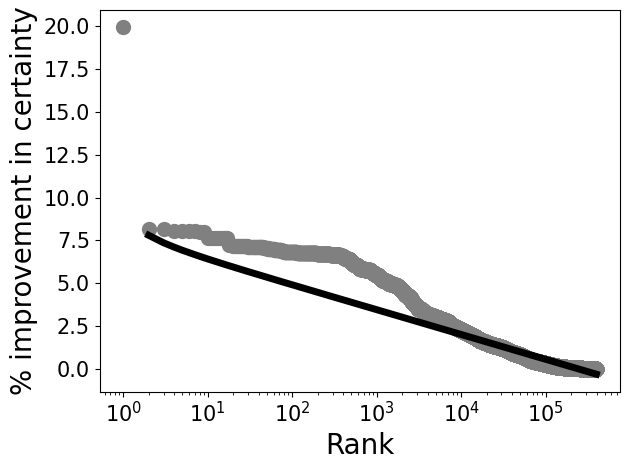

In [3]:
display(
    Markdown(
f""" 
Before describing the evaluation output, let me remind the reader of our aim and the constraints of our context.


## The story so far
The aim of this investigation has been to identify features within patients’ primary-care electronic healthcare records
that are associated with our provisional definition of complex mental health difficulties. In `UNSEEN_create_caseness_variales.ipynb`,
I show that the caseness of complex mental health difficulties can be known with considerable certainty, in this dataset. We know this
because the entropy of our caseness variable is ${round(entropy_caseness_scaled, 1)}\%$ of its theoretical maximum, i.e. it is only
${round(entropy_caseness_scaled, 1)}\%$ as uncertain / surprising / unforeseeable as it could possibly be. Conversely, this means
the caseness of a given patient record is ${100-round(entropy_caseness_scaled, 1)}\%$ as certain / unsurprising / foreseeable as it could possibly be.
In fact, we could correctly classify ${round(hitRate_none, 1)}\%$ of patient records in this our dataset if we simply assumed that no record met
our definition fpr complex mental health difficulties. Thus, I knew from an early stage that it would be difficult for any feature set to improve the indicative
performance of simply assuming that the patient record did not meet out definition.

<br/>
<br/>

## The findings
### _The distribution of feature sets across the range of scaled mutual information observed._

The vast majority of feature sets score very low for scaled mutual information, which means they do little to improve our certainty about
whether a patient record met our definition for the caseness of complex mental health difficulties. To illustrate this point, below I show the scaled
mutual information for each feature in ranked order.

The rank on the horizontal axis is presented in $log_{{10}}$ to illustrate how slowly the scaled mutual information declines with orders of magnitude
of rank. This is visualised by a straight line fit through the log rank. For example, the data points in the bottom right tell us that approximately
$10^{{5.5}} = 350,000$ feature sets show a scaled mutual information <1%; this is $86$% of all feature sets. On the other hand, the outlier in the top
left represents the single feature set that showed a >8.2% scaled mutual information: the count of psychological disorders.

From this plot we can learn two things:

1. There is an obvious thresold at approximately 8.2% scaled mutual information that distinguishes the feature representing the count of psychological disorders as a
solitary, outstanding feature.

2. The continuously-dropping distribution of remaining features suggests there are no other non-arbitrary thresholds to distinguish clusters of feature sets.

"""
    )
)
# Fit line of best fit to the non-zero log counts.
m, b = numpy.polyfit(numpy.log10(eval_output.index+1), eval_output.Scaled_mutual_information, 1)
pred_y = m*numpy.log10(eval_output.index) + b
# Plot.
matplotlib.pyplot.scatter(
    eval_output.index+1
    ,eval_output.Scaled_mutual_information*100
    ,color = 'grey'
    ,s = 100
)
matplotlib.pyplot.plot(
    eval_output.index+1
    ,pred_y*100
    ,color = 'black'
    ,linewidth = 5
)
matplotlib.pyplot.xscale('log')
#matplotlib.pyplot.title('$Log_{10}$ rank of feature sets.\nEach unit increase in the horizontal axis is an order of magnitude.\nNote that most feature sets don\'t improve certainty much.')
matplotlib.pyplot.ylabel('% improvement in certainty', fontsize = 20)
matplotlib.pyplot.yticks(fontsize = 15)
matplotlib.pyplot.xlabel('Rank', fontsize = 20)
matplotlib.pyplot.xticks(fontsize = 15)
matplotlib.pyplot.tight_layout()

# Save figures.
matplotlib.pyplot.savefig(f'{plot_dir}/logrank_all.png')


### _The best-performing feature set: the count of psychological disorders._

The best-performing feature set is the count of psychological disorders, which has a scaled mutual information of
$19.9$%. This means that by knowing these feature sets, the caseness
of a patient record is now $88.6$%
as certain / unsurprising / foreseeable as it could possibly be - a minor improvement on what was previously 
$85.7$%.

As a count variable, the odds ratio is the only evaluation statistics available. Its odds ratio of
$2.21$ means that, in the context of all unmeasured confounding and bias, we expect
the odds of meeting our definition for complex mental health difficulties to be, on average,
$2.21$-times greater for records that have an additional psychological disorder.
Another interpretation of the odds ratio is to see it as the ratio of observations that are correctly classified and
observations that are incorrectly classified. So, on average, simply knowing whether records have an additional diagnosis of a
psychological disorder means we correctly classified a little over twice as many as we incorrectly classified. One should
be cautious with this relativistic interpretation because twice a small number is still a small number.

I also note that the modal count of recorded psychological disorders in our study population is
$1$. So, my previous interpretations of the odds ratio is strongly biased to saying that
we expect the odds of satisfying our definition for complex mental health difficulties to be, on average,
$2.21$-times greater for having two rather than one psychological disorders.

From the plots below, I deduce that the distribution follows a slightly underdispersed Poisson distribution
(mean:variance ratio of $0.69<1$),
and that the tally of records with each count of psychological disorders increases by an order of magnitude for every additional
psychological disorder (evidenced by the straight-lined slope of the right-most plot showing $log_{10}$ tallies).


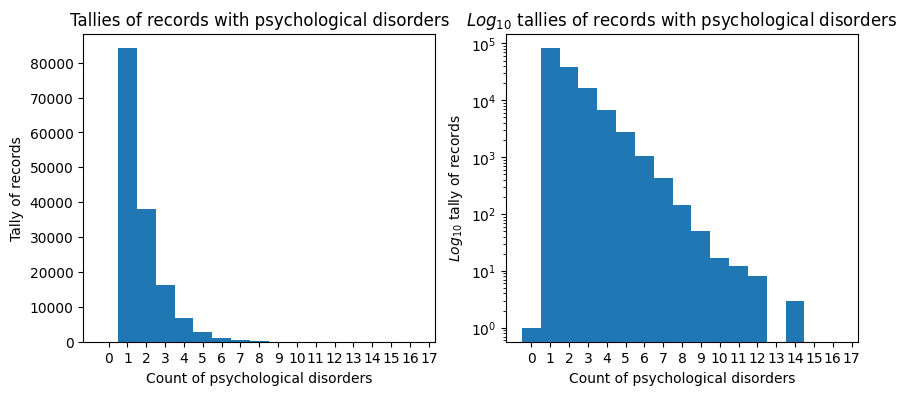


<br/>
Beyond what might seem like an obvious association, I note that the probability and the odds ratios of records
that meet our definition of complex mental health difficulties monotonically increases with every additional diagnosis
recorded.
<br/>
<br/>


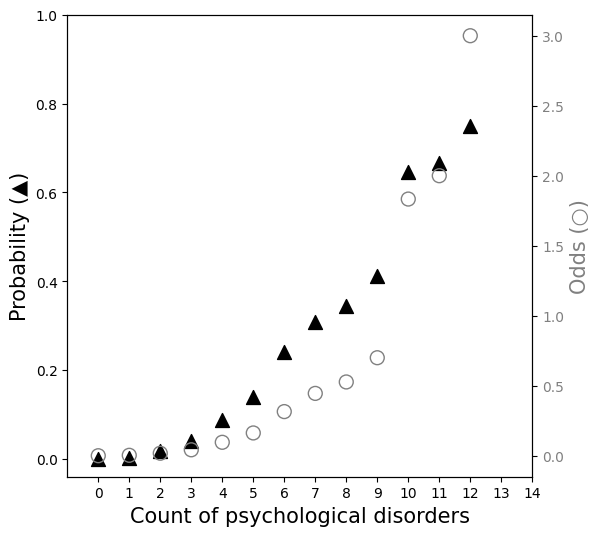

In [10]:
display(
    Markdown(
f"""
### _The best-performing feature set: the count of psychological disorders._

The best-performing feature set is the count of psychological disorders, which has a scaled mutual information of
${round(eval_output.Scaled_mutual_information[0]*100, 1)}$%. This means that by knowing these feature sets, the caseness
of a patient record is now ${round(100 - (entropy_caseness_scaled * (1 - (eval_output.Scaled_mutual_information[0] ))), 1)}$%
as certain / unsurprising / foreseeable as it could possibly be - a minor improvement on what was previously 
${round(100 - entropy_caseness_scaled, 2)}$%.

As a count variable, the odds ratio is the only evaluation statistics available. Its odds ratio of
${eval_output.Odds_ratio[0]}$ means that, in the context of all unmeasured confounding and bias, we expect
the odds of meeting our definition for complex mental health difficulties to be, on average,
${eval_output.Odds_ratio[0]}$-times greater for records that have an additional psychological disorder.
Another interpretation of the odds ratio is to see it as the ratio of observations that are correctly classified and
observations that are incorrectly classified. So, on average, simply knowing whether records have an additional diagnosis of a
psychological disorder means we correctly classified a little over twice as many as we incorrectly classified. One should
be cautious with this relativistic interpretation because twice a small number is still a small number.

I also note that the modal count of recorded psychological disorders in our study population is
${eval_output.Mode[0].astype(int)}$. So, my previous interpretations of the odds ratio is strongly biased to saying that
we expect the odds of satisfying our definition for complex mental health difficulties to be, on average,
${eval_output.Odds_ratio[0]}$-times greater for having two rather than one psychological disorders.

From the plots below, I deduce that the distribution follows a slightly underdispersed Poisson distribution
(mean:variance ratio of ${round(numpy.var(feature_set_array.countPsychologicalDisorders) / numpy.mean(feature_set_array.countPsychologicalDisorders), 2)}<1$),
and that the tally of records with each count of psychological disorders increases by an order of magnitude for every additional
psychological disorder (evidenced by the straight-lined slope of the right-most plot showing $log_{{10}}$ tallies).
"""
    )
)

# Plot distribution of recorded counts of psychological disorders.
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize = (10, 4))
axs[0].hist(feature_set_array.countPsychologicalDisorders, bins = range(18), align = 'left')
axs[0].set_title('Tallies of records with psychological disorders')
#axs[0].set_title('(Most people have only one)')
axs[0].set_xlabel('Count of psychological disorders')
axs[0].set_ylabel('Tally of records')
axs[0].set_xticks(numpy.arange(18))
axs[1].hist(feature_set_array.countPsychologicalDisorders, bins = range(18), align = 'left', log = True)
axs[1].set_title('$Log_{10}$ tallies of records with psychological disorders')
#axs[1].set_title('(Most people have only one)')
axs[1].set_xlabel('Count of psychological disorders')
axs[1].set_ylabel('$Log_{10}$ tally of records')
axs[1].set_xticks(numpy.arange(18))
matplotlib.pyplot.show()



display(
    Markdown(
f"""
<br/>
Beyond what might seem like an obvious association, I note that the probability and the odds ratios of records
that meet our definition of complex mental health difficulties monotonically increases with every additional diagnosis
recorded.
<br/>
<br/>
"""
    )
)

# Plot trend of increasing probability and odds.
df = caseness_array.merge(feature_set_array[['person_id', 'countPsychologicalDisorders']], on = 'person_id')
mySum = df.groupby('countPsychologicalDisorders').caseness_1isYes.sum()
myCount = df.groupby('countPsychologicalDisorders').caseness_1isYes.count()
myProb = mySum / myCount
myProb[13] = myProb[14] = numpy.inf
myOdds = myProb / (1 - myProb)
xrange = range( len(myOdds) )
colProb = 'k'
colOdds = 'grey'
fig, axis1 = matplotlib.pyplot.subplots(figsize = (6, 6))
axis2 = axis1.twinx()
axis1.scatter(xrange, myProb, color = colProb, marker = '^', s = 100)
axis2.scatter(xrange, myOdds, color = colOdds, facecolors = 'none', edgecolors = colOdds, s = 100)
axis1.set_xlabel('Count of psychological disorders', fontsize = 15)
axis1.set_xticks(range(18))
axis1.set_ylabel('Probability (\u25B2)', color = colProb, fontsize = 15)
axis1.tick_params(axis = "y", labelcolor = colProb)
axis2.set_ylabel('Odds (\u25CB)', color = colOdds, fontsize = 15)
axis2.tick_params(axis = "y", labelcolor = colOdds)
axis1.set_xlim(-1, max(xrange))
axis1.set_ylim(-0.04, 1)
fig.show()


### _Differences in performance of component features, feature families, and feature family combinations._

The figure below shows the log-scaled mutual information-by-rank plot like before but distinguishing component features (A), feature families (B), and feature family combinations (C).
<br/>

It is clear that:

1. all types of feature set are distributed across ranks;

2. all types of feature set appear more often at lower values of scaled mutual information.


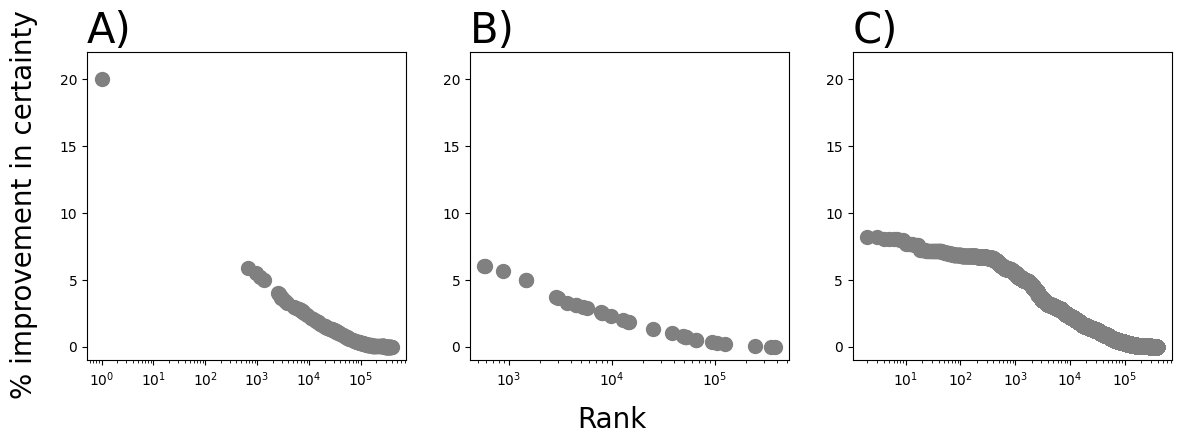

In [11]:
display(
    Markdown(
f"""
### _Differences in performance of component features, feature families, and feature family combinations._

The figure below shows the log-scaled mutual information-by-rank plot like before but distinguishing component features (A), feature families (B), and feature family combinations (C).
<br/>

It is clear that:

1. all types of feature set are distributed across ranks;

2. all types of feature set appear more often at lower values of scaled mutual information.
"""
    )
)

# Extract each dataset.
fs_component = eval_output.iloc[(len( re.findall(r'._\w._', i_fs) ) == 0 for i_fs in eval_output.Feature_set)].drop(eval_output[eval_output.Feature_set == 'antipsychoticsPrescription'].index)
fs_family = eval_output.iloc[(len( re.findall(r'x', i_fs) ) == 7 for i_fs in eval_output.Feature_set)]#
fs_familyCombins = eval_output.loc[~eval_output.index.isin(numpy.concatenate((fs_family.index.values, fs_component.index.values)))]
# Plot distribution of recorded counts of psychological disorders.
fig, axs = matplotlib.pyplot.subplots(1, 3, figsize = (14, 4))
fig.text(0.5, -0.06, 'Rank', ha = 'center', fontsize = 20)
fig.text(0.07, 0.5, '% improvement in certainty', va = 'center', rotation = 'vertical', fontsize = 20)
# Plot.
# # fs_component
axs[0].scatter(
    fs_component.index+1
    ,fs_component.Scaled_mutual_information*100
    ,color = 'gray'
    ,s = 100
)
axs[0].set_xscale('log')
axs[0].set_title('A)', loc = 'left', fontsize = 30)
axs[0].set_ylim(-1, 22)
# # fs_family
axs[1].scatter(
    fs_family.index+1
    ,fs_family.Scaled_mutual_information*100
    ,color = 'gray'
    ,s = 100
)
axs[1].set_xscale('log')
axs[1].set_title('B)', loc = 'left', fontsize = 30)
axs[1].set_ylim(-1, 22)
# # fs_familyCombins
axs[2].scatter(
    fs_familyCombins.index+1
    ,fs_familyCombins.Scaled_mutual_information*100
    ,color = 'gray'
    ,s = 100
)
axs[2].set_xscale('log')
axs[2].set_title('C)', loc = 'left', fontsize = 30)
axs[2].set_ylim(-1, 22)
#matplotlib.pyplot.tight_layout()

# Save figures.
matplotlib.pyplot.savefig(f'{plot_dir}/logrank_stratified.png', bbox_inches="tight")

In [20]:

display(
    Markdown(
f"""
<br/>
The table below shows the five feature sets with the highest scaled mutual information, for each feature-set type.
<br/>
<br/>

#### Component feature sets
Apart from the aforementioned, outstanding performance of the count of psychological disorders, three of the top-five
component features are entropy measures of did-not-attend patterns, from the Inconsistency family of features.
Active information was a measure of how consistent the pattern of the latest three-months of did-not-attend events
were with the pattern of the preceding year of did-not-attend events
([Lizier, Prokopenko, and Zomaya 2012](https://www.sciencedirect.com/science/article/abs/pii/S0020025512002800?via%3Dihub)).
Larger values indicate greater consistency. The odds ratio >1 indicates that records were more likely to satisfy our
definition of complex mental health difficulties if the pattern of recent did-not-attend events was consistent with the
historic pattern.
Spectral entropy quantified the uncertainty of the frequency of did-not-attend events 
([Inouye _et al._ 1991](https://pubmed.ncbi.nlm.nih.gov/1714811/)). Smaller values indicate less uncertainty.
The odds ratio <0.01 indicates that records were very unlikely to satisfy our definition of complex mental health
difficulties if the frequency of did-not-attend events was uncertain.
Average entropy quantified the typical uncertainty of quarterly did-not-attend patterns. Larger values indicate
consistent uncertainty over time. The odds ratio >1 indicates that records were more likely to satisfy our definition
of complex mental health difficulties if the pattern of did-not-attend events was consistently uncertain.
Considering these Inconsistency-family features together, we summarise that caseness was indicated by consistent
uncertainty in quarterly patterns of both the counts and frequency of did-not-attend events. But the scaled mutual
information was low, at only 4.9-5.8%.
<br/>
<br/>

#### Feature families
The Antipsychotic Prescription family, the Treatment family, and the Concurrent family had top-five mutual information
scores. By definition, the feature sets indicating absence of features ('None') and the presence of features ('Not none')
had the same scaled mutual information score but differed for the other, more-traditional evaluation
statistics. The odds ratios suggested that, for the Antipsychotic Prescription and the Treatment families, it was the presence
of features from these families that indicated caseness. Generally, positive predictive value and class balanced accuracy were
poor, with exception of the feature indicating the presence of antipsychotic prescriptions ( PPV = 0.21 ).
<br/>
<br/>

#### Feature family combinations
Feature family combinations scored better than component features and feature families, though scores were low, generally.
The common sub-combination (and highest scorer) was no antipsychotic prescriptions, with 1-3 Concurrent-family features, with
or without the presence of Service Use-family features. Records with this sub-combination were less likely to meet
our definition of caseness. All remaining combinations in the top-5 included at least one feature from either or both of the
Relevant Prescription or Patterns of Prescription families.
<br/>

"""
    )
)

# Make table of top five feature sets from each type, with ties merged.
# # Family feature sets.
# # Make temp copy.
df = fs_family.copy()
top5_stats = \
    df.loc[df.Scaled_mutual_information.isin(numpy.sort( list( set(df.Scaled_mutual_information) ) )[::-1][0:5]),
           ~df.columns.isin(['Feature_set', 'Feature_set_short', 'Data_type'])].drop_duplicates()
# # Concatenate feature set names and join.
top5 = top5_stats.merge(
    df.groupby(['Scaled_mutual_information', 'Prevalence_per_thousand'])['Feature_set_short'].apply(
        list)[::-1], how = 'left', on = ['Scaled_mutual_information', 'Prevalence_per_thousand']).copy()
# # Rearrange columnes.
cols = top5.columns.tolist()
cols = cols[-1:] + cols[:-1]
top5_family = top5[cols].copy()
# # Family combination feature sets.
# # Make temp copy.
df = fs_familyCombins[0:50].copy()
#top5_stats = pandas.DataFrame(numpy.sort( list( set(df.Scaled_mutual_information) ) )[::-1][0:5], columns = ['Scaled_mutual_information'])
top5_stats = \
    df.loc[df.Scaled_mutual_information.isin(numpy.sort( list( set(df.Scaled_mutual_information) ) )[::-1][0:5]),
           ~df.columns.isin(['Feature_set', 'Feature_set_short', 'Data_type'])].drop_duplicates()
# # Concatenate feature set names and join.
top5 = top5_stats.merge(
    df.groupby(['Scaled_mutual_information', 'Prevalence_per_thousand'])['Feature_set_short'].apply(
        list)[::-1], how = 'left', on = ['Scaled_mutual_information', 'Prevalence_per_thousand']).copy()
# # Rearrange columnes.
cols = top5.columns.tolist()
cols = cols[-1:] + cols[:-1]
top5_familyCombins = top5[cols].copy()

# Present table.
top5_table = \
    pandas.concat(
    [
    fs_component.iloc[0:5, ~fs_component.columns.isin(['Feature_set', 'Data_type'])]
    ,top5_family
    ,top5_familyCombins
    ]
)
top5_table.to_csv('top5_table.csv')
top5_table


<br/>
The table below shows the five feature sets with the highest scaled mutual information, for each feature-set type.
<br/>
<br/>

#### Component feature sets
Apart from the aforementioned, outstanding performance of the count of psychological disorders, three of the top-five
component features are entropy measures of did-not-attend patterns, from the Inconsistency family of features.
Active information was a measure of how consistent the pattern of the latest three-months of did-not-attend events
were with the pattern of the preceding year of did-not-attend events
([Lizier, Prokopenko, and Zomaya 2012](https://www.sciencedirect.com/science/article/abs/pii/S0020025512002800?via%3Dihub)).
Larger values indicate greater consistency. The odds ratio >1 indicates that records were more likely to satisfy our
definition of complex mental health difficulties if the pattern of recent did-not-attend events was consistent with the
historic pattern.
Spectral entropy quantified the uncertainty of the frequency of did-not-attend events 
([Inouye _et al._ 1991](https://pubmed.ncbi.nlm.nih.gov/1714811/)). Smaller values indicate less uncertainty.
The odds ratio <0.01 indicates that records were very unlikely to satisfy our definition of complex mental health
difficulties if the frequency of did-not-attend events was uncertain.
Average entropy quantified the typical uncertainty of quarterly did-not-attend patterns. Larger values indicate
consistent uncertainty over time. The odds ratio >1 indicates that records were more likely to satisfy our definition
of complex mental health difficulties if the pattern of did-not-attend events was consistently uncertain.
Considering these Inconsistency-family features together, we summarise that caseness was indicated by consistent
uncertainty in quarterly patterns of both the counts and frequency of did-not-attend events. But the scaled mutual
information was low, at only 4.9-5.8%.
<br/>
<br/>

#### Feature families
The Antipsychotic Prescription family, the Treatment family, and the Concurrent family had top-five mutual information
scores. By definition, the feature sets indicating absence of features ('None') and the presence of features ('Not none')
had the same scaled mutual information score but differed for the other, more-traditional evaluation
statistics. The odds ratios suggested that, for the Antipsychotic Prescription and the Treatment families, it was the presence
of features from these families that indicated caseness. Generally, positive predictive value and class balanced accuracy were
poor, with exception of the feature indicating the presence of antipsychotic prescriptions ( PPV = 0.21 ).
<br/>
<br/>

#### Feature family combinations
Feature family combinations scored better than component features and feature families, though scores were low, generally.
The common sub-combination (and highest scorer) was no antipsychotic prescriptions, with 1-3 Concurrent-family features, with
or without the presence of Service Use-family features. Records with this sub-combination were less likely to meet
our definition of caseness. All remaining combinations in the top-5 included at least one feature from either or both of the
Relevant Prescription or Patterns of Prescription families.
<br/>



,Feature_set_short,Scaled_mutual_information,Prevalence_per_thousand,Mean,Mode,Class_balanced_accuracy,Odds_ratio,ppv,npv,tn,fn,fp,tp
0,countPsychologicalDisorders,0.199479,None,NaN,1.0,NaN,2.21,None,NaN,NaN,NaN,NaN,NaN
656,activeInformationDNAs,0.058378,None,0.22,NaN,NaN,3.43,None,NaN,NaN,NaN,NaN,NaN
964,countAntidepressantPrescriptions,0.055223,None,NaN,0.0,NaN,1.05,None,NaN,NaN,NaN,NaN,NaN
1161,spectralEntropyDNAs,0.052062,None,0.89,NaN,NaN,0.0,None,NaN,NaN,NaN,NaN,NaN
1376,averageEntropyDNAs,0.050110,None,0.21,NaN,NaN,22.93,None,NaN,NaN,NaN,NaN,NaN
0,[Y0],0.060321,981.9,NaN,NaN,0.02,0.07,0.02,0.79,2148.0,562.0,144528.0,2481.0
1,[Y1],0.060321,18.1,NaN,NaN,0.58,15.24,0.21,0.98,144528.0,2481.0,2148.0,562.0
2,[C2],0.056454,856.07,NaN,NaN,0.08,0.2,0.01,0.94,20183.0,1366.0,126493.0,1677.0
3,[T0],0.049597,647.17,NaN,NaN,0.18,0.24,< 0.01,0.96,50721.0,2105.0,95955.0,938.0
4,[T1],0.049597,352.83,NaN,NaN,0.35,4.25,0.04,0.99,95955.0,938.0,50721.0,2105.0


###### What, if any, are the patterns of feature families, across the range of scaled mutual information?

Distinguishing the set of 16, second-best features is, perhaps, a stretch of analysis. Are they meaningfully distinct from the rest of the feature sets scoring lower than the count of psychological disorders? As I noted with the log-count plot earlier, plotting all features' scaled mutual information in ranked order shows something like a power distribution. A feature of this is the futility of zooming in to portions of the plot to find a 'kink' or threshold to mark out sets of features because the power-law shape is present at all points (an attribute known as "scale invariance").

Rather than look for threshold to define particular sets of feature sets, I suggest decribing the patterns in each feature family across the range of scaled mutual information. This enables me to make statements about the prevalence of family levels at high, middle, and low scaled mutual informaiton. It might be the case that the levels for a family are scattered throughout the full range of scaled mutual information, in which case I won't read much into the correspondance of particular levels with high scaled mutual information (or low, for that matter). On the other hand, I might find that some levels of some families are present only in combinations that correspond to high scaled mutual information but not at low. This would lead me to propose that the level's presence in high scoring combinations is a true positive rather than a false positive.

Practically, I will slice the family-combination features into quantiles of scaled mutual information, and calculate the proportion of each level that is expressed within each family. The plan is:


1. Create separate lists of `eval_output.Feature_set_short` for each quantiles of `eval_output.Scaled_mutual_information`.

2. For each quantile list, calculate the proportion of each family's level.

3. For each family, plot the porportion of each level, across the quantiles of scaled mutual information.

4. Review the plots to see if any patterns are evident.


As of 31st October 2023, my immediate comments on the patterns are:

1. Most levels of most families vary across the quantiles.

2. Some U and inverted-U shapes appear, but these mean that the highest- and lowest-scoring features are not distinguished by that family's level.

3. Proportions of the presence of both Patterns of Prescriptions-family features and Relevant Prescriptions-family features are less in higher quantiles.

4. Proportions of Service Use level 4 (i.e. > 6) follow a trend of being higher in lower quantiles.

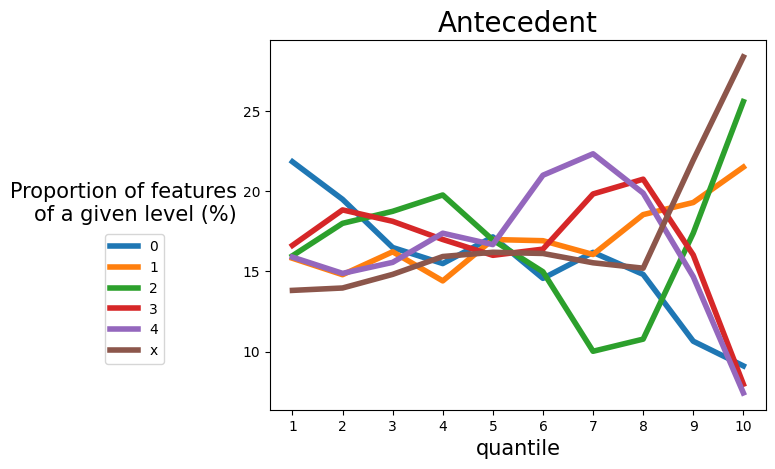

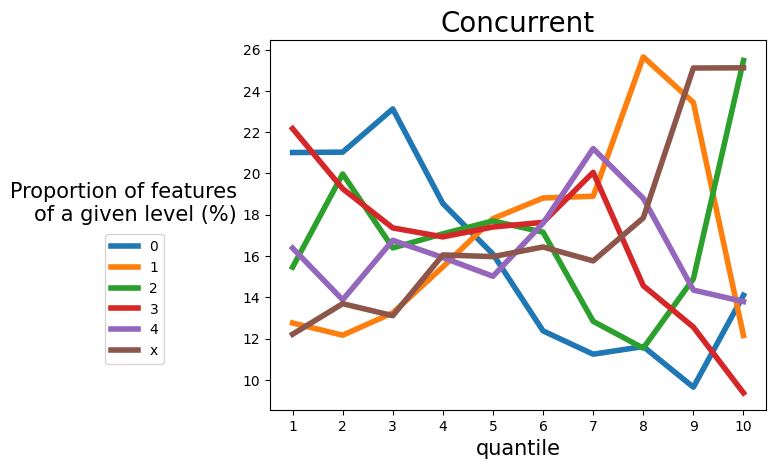

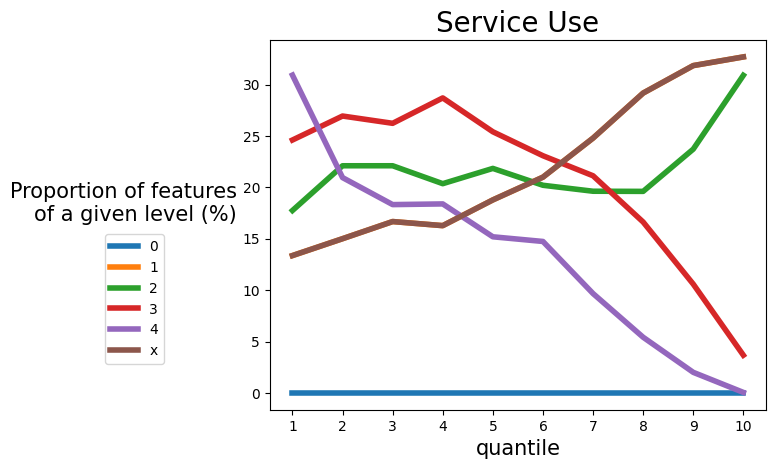

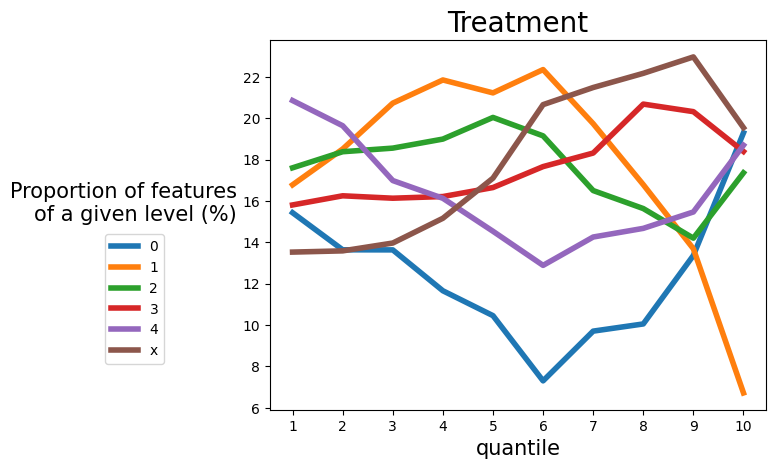

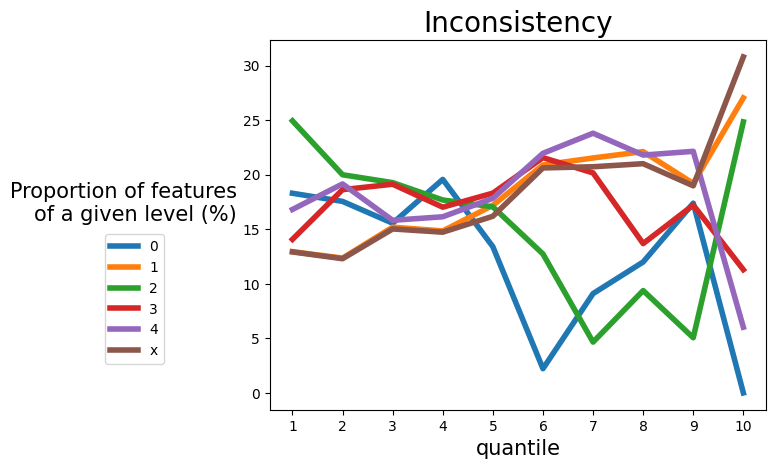

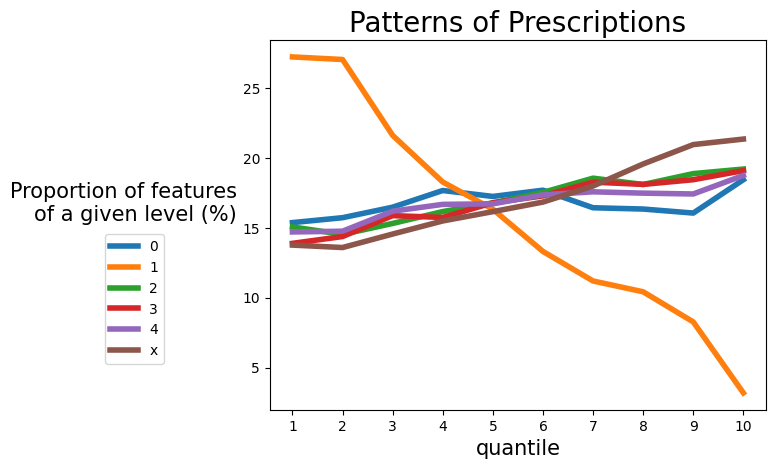

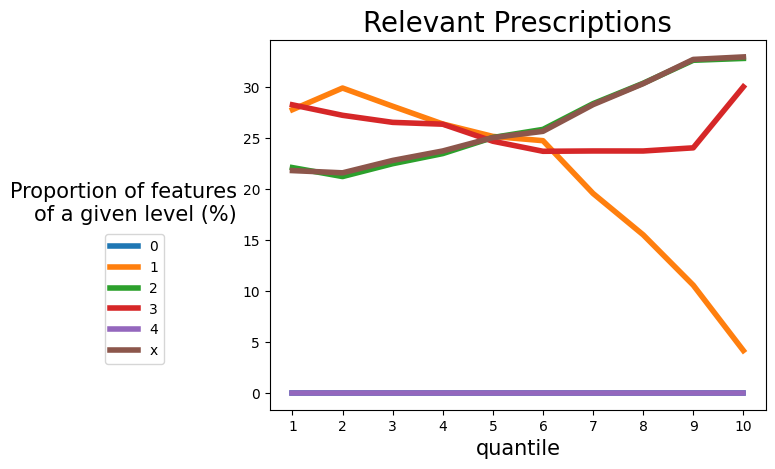

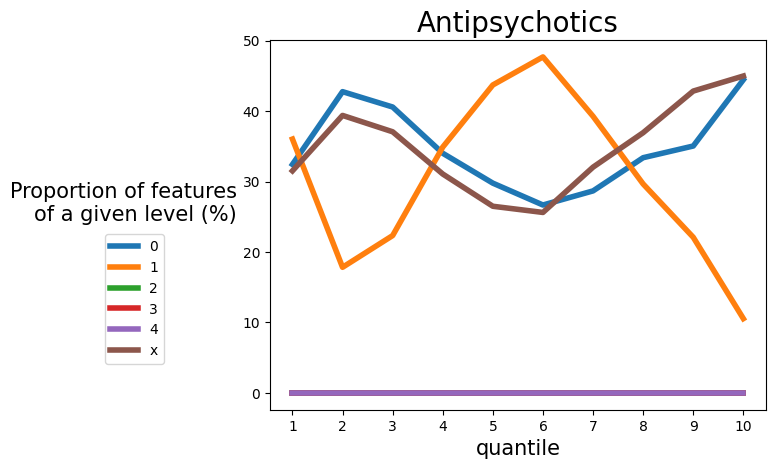

In [21]:
# Create separate lists of `eval_output.Feature_set_short` for each quantile of `eval_output.Scaled_mutual_information`.
n_quantiles = 10
feature_set_name = eval_output.Feature_set.copy()
quantile = pandas.qcut( eval_output.Scaled_mutual_information, n_quantiles, labels = False, duplicates = 'drop' )
quantile_df = pandas.concat( [feature_set_name, quantile], axis = 1 )
if len( set(quantile_df.Scaled_mutual_information) ) != n_quantiles:
    old_n_quantiles = n_quantiles
    n_quantiles = len( set(quantile_df.Scaled_mutual_information) )
    print(f'NOTE: Some quantiles have been merged. The selected {old_n_quantiles} have been replaced with {n_quantiles}.')
# ## Collate the family-combination features, only.
quantile_df = quantile_df[ [any([substr in fs for substr in ["A0", "A1", "A2", "A3", "A4", "Ax"] ] ) for fs in quantile_df.Feature_set ] ]

# For each quantile list, calculate the proportion of each family's level.
# ## Set the storage lists.
counts_A = []; counts_C = []; counts_S = []; counts_T = []
counts_K = []; counts_P = []; counts_R = []; counts_Y = []
for i_quantile in range(n_quantiles):
    denominator = sum(quantile_df.Scaled_mutual_information == i_quantile)
    counts_A.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["A0", "A1", "A2", "A3", "A4", "Ax"] ] )
    counts_C.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["C0", "C1", "C2", "C3", "C4", "Cx"] ] )
    counts_S.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["S0", "S1", "S2", "S3", "S4", "Sx"] ] )
    counts_T.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["T0", "T1", "T2", "T3", "T4", "Tx"] ] )
    counts_K.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["K0", "K1", "K2", "K3", "K4", "Kx"] ] )
    counts_P.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["P0", "P1", "P2", "P3", "P4", "Px"] ] )
    counts_R.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["R0", "R1", "R2", "R3", "R4", "Rx"] ] )
    counts_Y.append( [ sum( [substr in i_fs for i_fs in quantile_df.Feature_set[quantile_df.Scaled_mutual_information == i_quantile] ] )/ denominator for substr in ["Y0", "Y1", "Y2", "Y3", "Y4", "Yx"] ] )
    
    
# For each family, plot the porportion of each level, across the quantiles of scaled mutual information.
# ## Set parameters.
x_range = range(1,n_quantiles+1)
labels = ["0", "1", "2", "3", "4", "x"]
# ## Transpose the lists.
counts_A = list( map( list, zip( *counts_A ) ) )
counts_C = list( map( list, zip( *counts_C ) ) )
counts_S = list( map( list, zip( *counts_S ) ) )
counts_T = list( map( list, zip( *counts_T ) ) )
counts_K = list( map( list, zip( *counts_K ) ) )
counts_P = list( map( list, zip( *counts_P ) ) )
counts_R = list( map( list, zip( *counts_R ) ) )
counts_Y = list( map( list, zip( *counts_Y ) ) )
# ## Plot Antecedents.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_A[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Antecedent', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()
# ## Plot Concurrents.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_C[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Concurrent', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()
# ## Plot Service Use.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_S[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Service Use', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()
# ## Plot Treatment.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_T[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Treatment', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()
# ## Plot Inconsistency.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_K[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Inconsistency', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()
# ## Plot Patterns of Prescription.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_P[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Patterns of Prescriptions', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()
# ## Plot Relevant Prescriptions.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_R[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Relevant Prescriptions', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()
# ## Plot Antipsychotics.
for i_label in range(len(labels)):
    matplotlib.pyplot.plot(x_range
                           ,[ i*100 for i in counts_Y[i_label] ]
                           ,label = labels[i_label]
                           ,linewidth = 4
                          )
matplotlib.pyplot.title('Antipsychotics', fontsize = 20)
matplotlib.pyplot.xticks( x_range )
matplotlib.pyplot.xlabel('quantile', fontsize = 15)
matplotlib.pyplot.ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
matplotlib.pyplot.legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
matplotlib.pyplot.show()

### What if I just looked at the 'None' and 'notNone' levels, for a binary comparison?

The motivation for this comes from observing that, most of the time, there were no patterns of prevalence across the quantiles. Perhaps the family levels are too specific and prescriptive. If we just look at the 'none' and 'notNone' levels, then we simplify the statistical summary and put more of the burden on interpretation. The statistical methods have ranked feature sets by their distinguishability, but it is up to us to determine the direction of the distinction.

For example, one could argue that the Relevant Prescriptions family has a trend of lesser prevalence of level 1 (i.e. at least one feature) in higher quantiles. We might describe this as saying that the distinguishability of cases and controls is associated with feature sets that specify Relevant Prescriptions-family features in patients' records. At the interpretation step, we need to determine whether the indicative absence of Relevant Prescriptions-family features is highlighting cases' relative lack of Relevant Prescriptions-family features or controls' relative lack of Relevant Prescriptions-family features. A reasonable answer might be that controls are the ones that relatively lack Relevant Prescriptions-family features, based on the assumption that controls are not prescribed the relevant prescriptions. But do we see this in our dataset?

The plots below relates to the families of features:

1. The leftmost plot shows the prevalence of feature combinations with the 'none' = 0 and 'notNone' = 1 levels.

2. The middle plot shows the proportion of 'none' = 0 and 'notNone' = 1 levels overall and for cases and controls.

3. The rightmost column shows a table with the proportions that are plotted in the second plot.

For the example of the Relevant Prescription-family features, we see that records meeting our definition for caseness have more Relevant Prescription-family features than controls: 48% > 23%. Hence, we are reassured that the reasonable answer we proposed earlier is supported by the evidence.

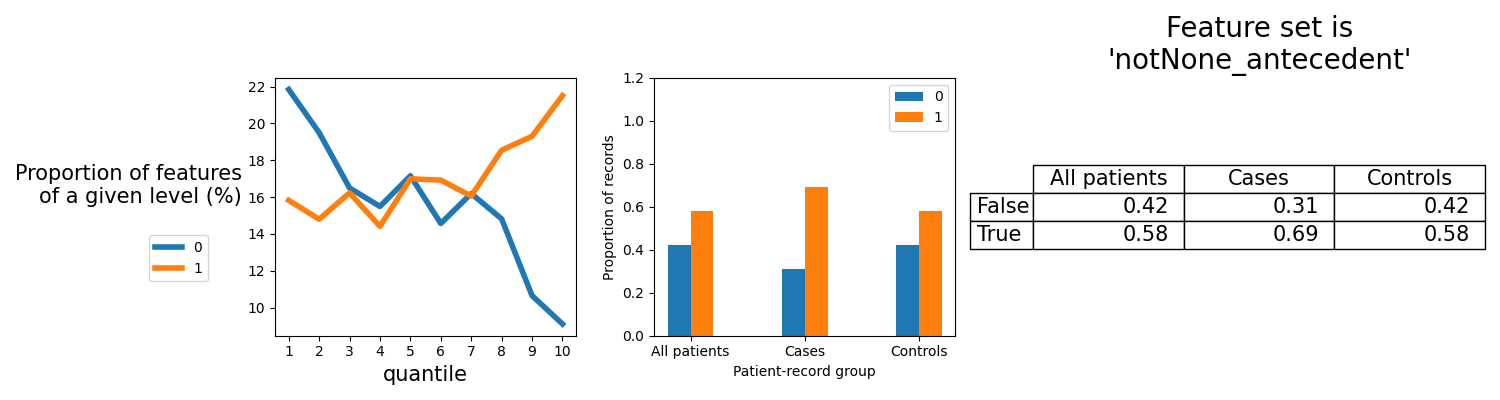

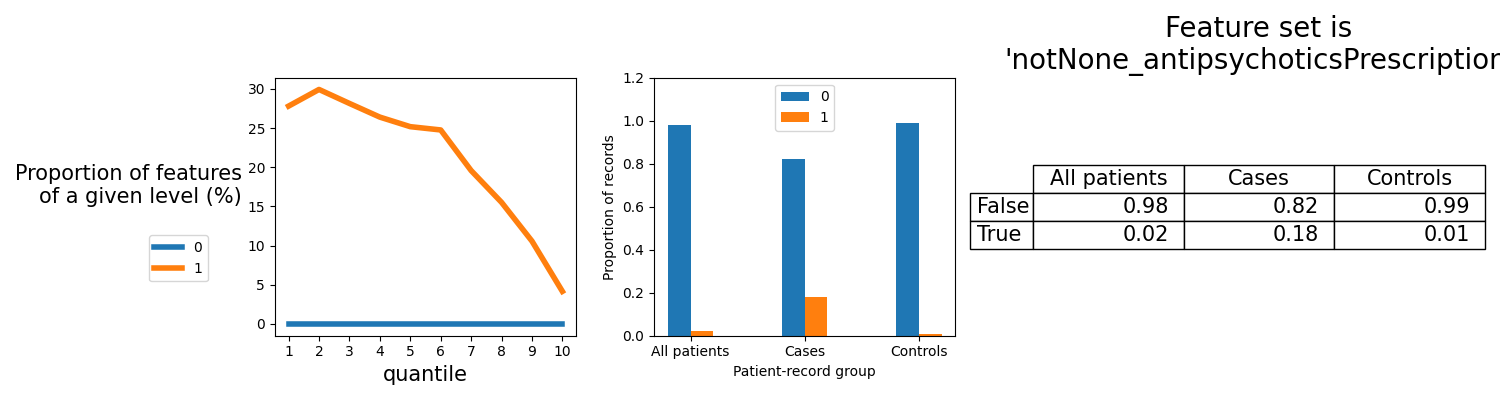

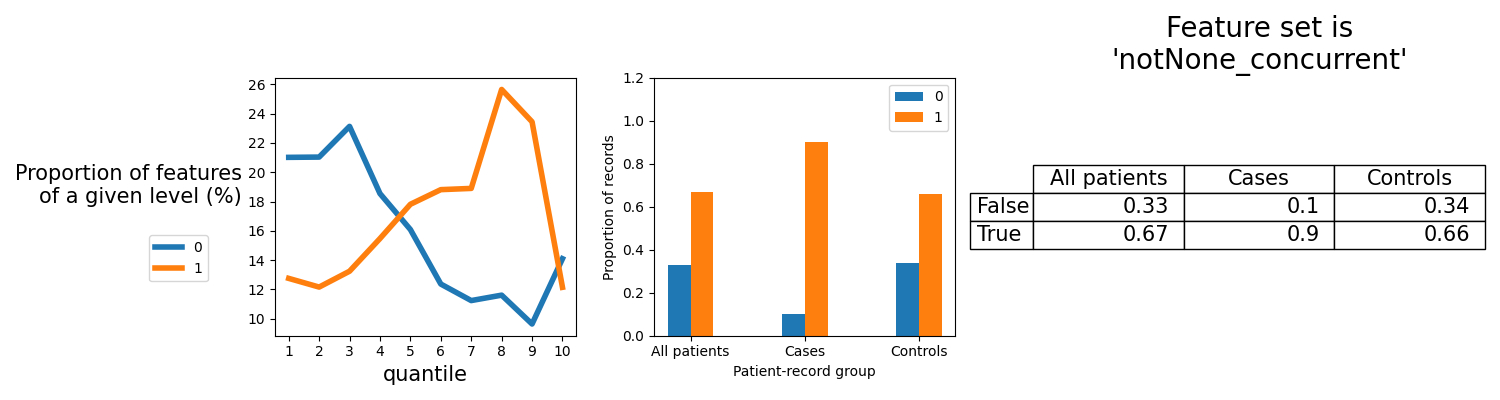

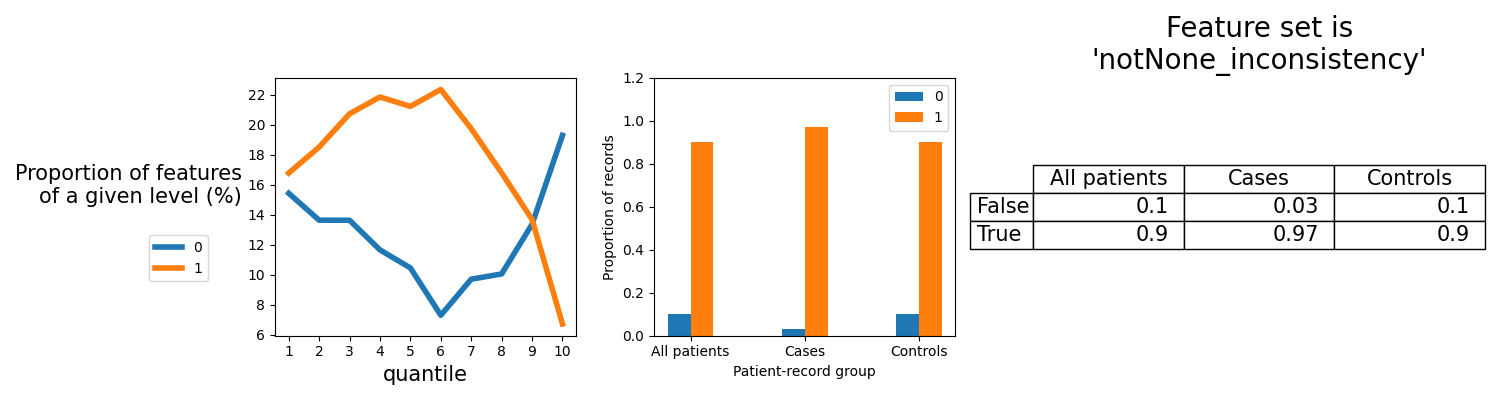

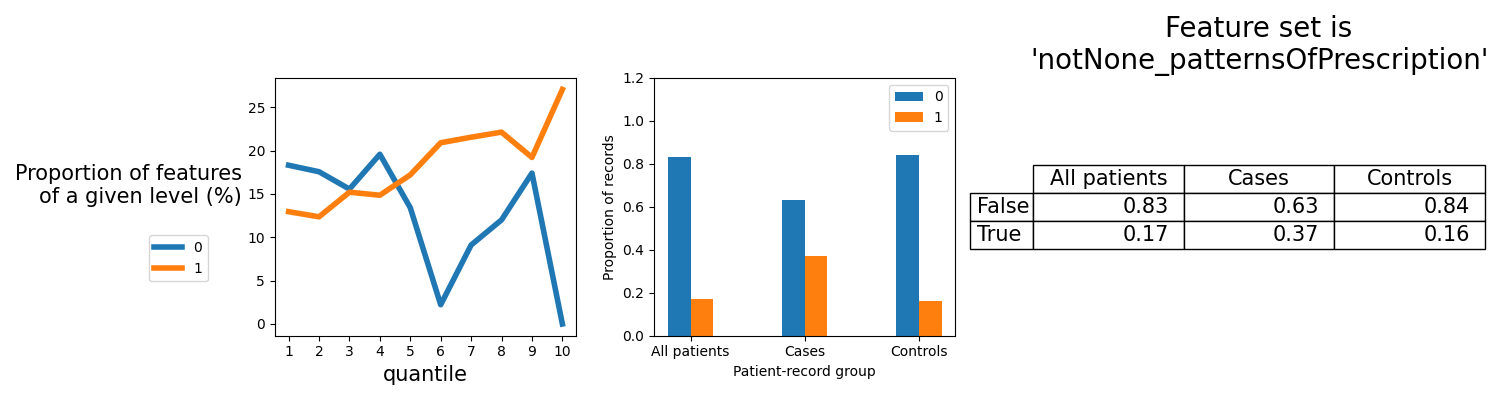

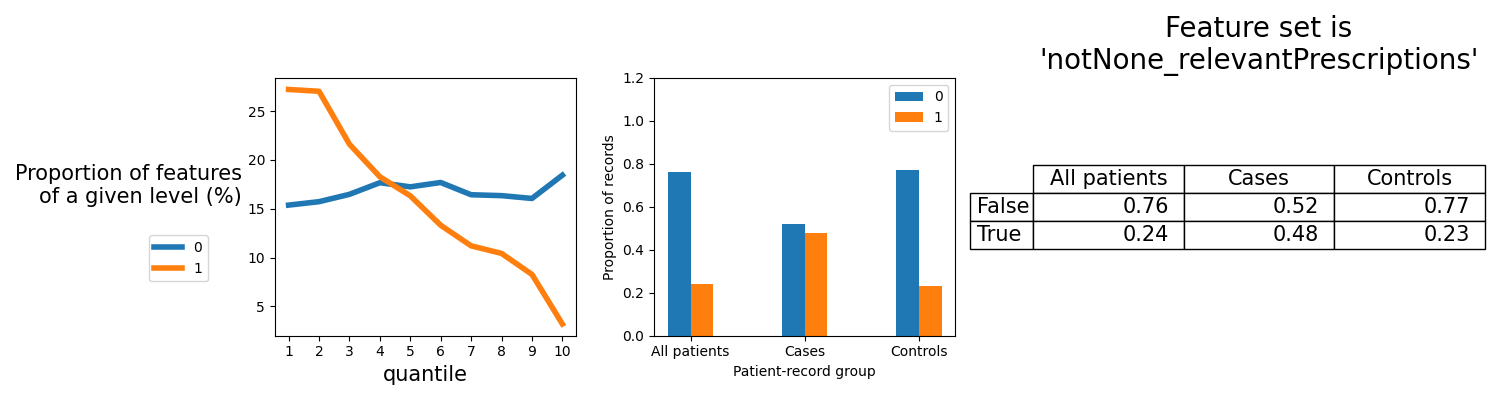

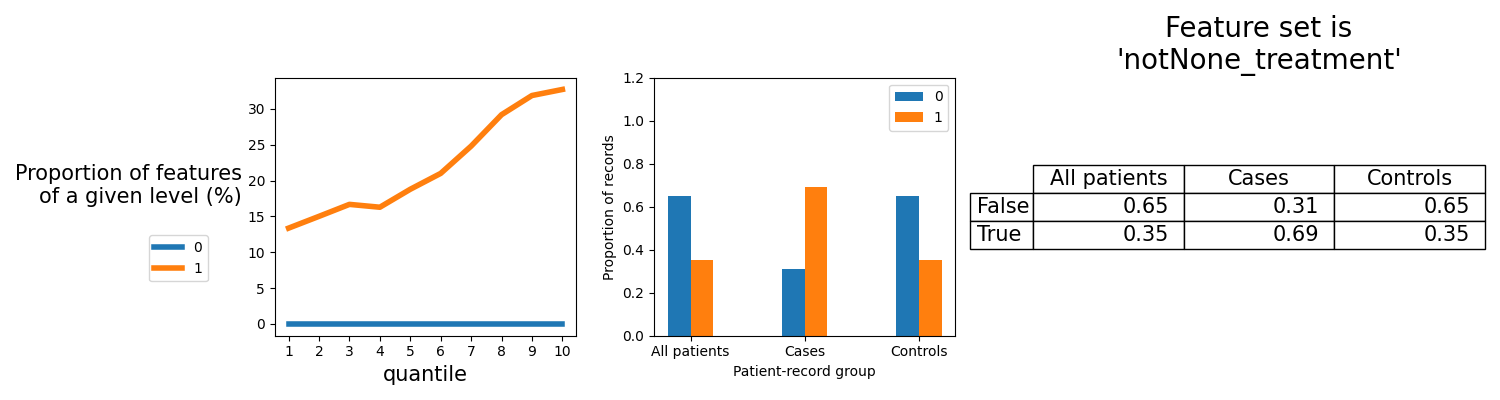

In [24]:
##########
## Data ##
##########
# Make dataframe of 'None' and 'notNone' variables for all families.
cols_of_interest = ['notNone_antecedent', 'notNone_concurrent', 'notNone_serviceUse', 'notNone_treatment', 'notNone_inconsistency',
                    'notNone_patternsOfPrescription', 'notNone_relevantPrescriptions', 'notNone_antipsychoticsPrescription']
df = nafsm_family_membership[ cols_of_interest ].astype(int)
df_counts = [counts_A, counts_C, counts_S, counts_T, counts_K, counts_P, counts_R, counts_Y]


# Redact and round.
df = df.loc[:,df.sum() > redaction_threshold].copy()
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
denominator_overall = round(len(caseness_array) / target_round) * target_round
denominator_caseness = round(sum(caseness_array.caseness_1isYes == 1) / target_round) * target_round
denominator_controls = round(sum(caseness_array.caseness_1isYes != 1) / target_round) * target_round

##############
## Plotting ##
##############
# Instantiate variables.
myPlotDataOverall = []
myPlotDataOverall_labels = []
myPlotDataCaseness = []
myPlotDataCaseness_labels = []
myPlotDataControls = []
myPlotDataControls_labels = []

# Set save location.
plot_dir = pathlib.Path(os.getcwd() + '/Plots/Descriptives/Families_noneNotNone')
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

for i_col in range(len(df.columns)):
    # Get set of values that are in the column.
    colVals = sorted(df.iloc[:,i_col].unique())
    
    # Count the occurence of each unique value, overall.
    ls_vals = []
    ls_vals_labels = []
    for i_val in colVals:
        rounded_value = \
            round(
                # Rounding to avoid disclosivity.
                round( sum(df.iloc[:,i_col] == i_val) / target_round) * target_round
                / denominator_overall
                , 2
            )
        ls_vals.append(rounded_value)
        ls_vals_labels.append( '< 0.01' if rounded_value == 0 else '> 0.99' if rounded_value == 1 else rounded_value )
    myPlotDataOverall.append(ls_vals)
    myPlotDataOverall_labels.append(ls_vals_labels)
    
    # Count the occurence of each unique value, for cases and for controls.
    ls_vals_caseness = []
    ls_vals_caseness_labels = []
    ls_vals_controls = []
    ls_vals_controls_labels = []
    for i_val in colVals:
        fs_present = df.iloc[:,i_col] == i_val
        caseness_present = caseness_array.caseness_1isYes == 1
        combined = pandas.concat([fs_present, caseness_present], axis = 1)
        rounded_value = \
            round(
                # Rounding to avoid disclosivity.
                round( sum(combined.sum(axis=1) == 2) / target_round) * target_round
                / denominator_caseness
                , 2
            )
        ls_vals_caseness.append(rounded_value)
        ls_vals_caseness_labels.append( '< 0.01' if rounded_value == 0 else '> 0.99' if rounded_value == 1 else rounded_value )
        
        control_present = caseness_array.caseness_1isYes != 1
        combined = pandas.concat([fs_present, control_present], axis = 1)
        rounded_value = \
            round(
                round( sum(combined.sum(axis=1) == 2) / target_round) * target_round 
                / denominator_controls
                , 2
            )
        ls_vals_controls.append(rounded_value)
        ls_vals_controls_labels.append( '< 0.01' if rounded_value == 0 else '> 0.99' if rounded_value == 1 else rounded_value )
    myPlotDataCaseness.append(ls_vals_caseness)
    myPlotDataCaseness_labels.append(ls_vals_caseness_labels)
    myPlotDataControls.append(ls_vals_controls)
    myPlotDataControls_labels.append(ls_vals_controls_labels)

# Combine each feature sets' tuples from the 'overall', 'caseness', and 'controls' plot data.
myData = list(map(list, zip(*[ myPlotDataOverall, myPlotDataCaseness, myPlotDataControls ])))
myData_labels = list(map(list, zip(*[ myPlotDataOverall_labels, myPlotDataCaseness_labels, myPlotDataControls_labels ])))

# Plot the visualisations for each feature set
for i_fs in range(len(df.columns)):
    fig, axs = matplotlib.pyplot.subplots(1, 3, figsize = (15,4),  gridspec_kw={'width_ratios': [2, 2, 3]})
    matplotlib.pyplot.title('Feature set is\n\'' + df.columns[i_fs] + '\'', fontsize = 20)
    
    # Plot level-prevalence plot.
    for i_label in range(2):
        axs[0].plot(x_range
                   ,[ i*100 for i in df_counts[i_fs][i_label] ]
                   ,label = labels[i_label]
                   ,linewidth = 4
                              )
    axs[0].set_xticks( x_range )
    axs[0].set_xlabel('quantile', fontsize = 15)
    axs[0].set_ylabel('Proportion of features\nof a given level (%)', fontsize = 15, rotation=0, ha='right')
    axs[0].legend(loc = 'center right', bbox_to_anchor = (-0.2, 0.3))
      
    # Plot distinguishing feature-set values.
    ind1 = [str( bool(i) ) for i in colVals]
    ind2 = ('All patients', 'Cases', 'Controls')
    axs[1].bar(x = ind2, height = list(map(list, zip(*myData[i_fs])))[0], width = -0.2,  align='edge')
    axs[1].bar(x = ind2, height = list(map(list, zip(*myData[i_fs])))[1], width = 0.2,   align='edge')
    axs[1].legend(colVals)
    axs[1].set_xlabel('Patient-record group')
    axs[1].set_ylabel('Proportion of records')
    axs[1].set_ylim(0, 1.2)

    the_table = axs[2].table(cellText = list(map(list, zip(*myData_labels[i_fs]))),
                          colLabels = ind2,
                          rowLabels = ind1,
                          loc = 'center')
    the_table.scale(1,2)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(15)
    axs[2].axis('off')
    matplotlib.pyplot.tight_layout()
    
    # Save figures.
    fig.savefig(f'{plot_dir}/{df.columns[i_fs]}.png')
    matplotlib.pyplot.close(fig)

# Create a list of all relevant files.
globbed_files = plot_dir.glob("*.png")
globbed_files = sorted(globbed_files)
# Plot each file.
for image_file in globbed_files:
    display(Image.open(image_file))